### Mounting Google Drive if have any

In [ ]:
from google.colab import drive
import sys
if('google.colab' in sys.modules):
  print("Google drive detected, mounting...")
  drive.mount('/content/gdrive')
else:
  print("No Google drive found, ignoring...")
print("Done checking")

Google drive detected, mounting...
Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Done checking


### Installing dependencies

In [ ]:
print("Installing program...")
if 'google.colab' in sys.modules:
  !pip install numpy pandas matplotlib seaborn scikit-learn tensorflow keras torch opencv-python labelme statsmodels scipy missingno
else:
  %pip install -r studio2.req.txt

Installing program...


### Import required libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as mno
import seaborn as sns
import itertools
from sklearn.preprocessing import OneHotEncoder

import os
import warnings

### Define config

In [ ]:
warnings.filterwarnings('ignore')

pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.options.display.float_format = '{:.7f}'.format

### Read CSV file and make a copy of it

In [ ]:
BASE_PATH = "/content/gdrive/MyDrive/Colab Notebooks/COS40007/Studio 2"
print(BASE_PATH)
raw_df = pd.read_csv(BASE_PATH + '/concrete.csv')
concrete_df = raw_df.copy()
concrete_df.head()

/content/gdrive/MyDrive/Colab Notebooks/COS40007/Studio 2


,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3000000,212.0000000,0.0000000,203.5000000,0.0000000,971.8000000,748.5000000,28,29.8900000
1,168.9000000,42.2000000,124.3000000,158.3000000,10.8000000,1080.8000000,796.2000000,14,23.5100000
2,250.0000000,0.0000000,95.7000000,187.4000000,5.5000000,956.9000000,861.2000000,28,29.2200000
3,266.0000000,114.0000000,0.0000000,228.0000000,0.0000000,932.0000000,670.0000000,28,45.8500000
4,154.8000000,183.4000000,0.0000000,193.3000000,9.1000000,1047.4000000,696.7000000,28,18.2900000


## Data Pre-processing

### Observe data

In [ ]:
print("Shape of data: ", concrete_df.shape)
print("Data types: ")
print(concrete_df.dtypes)
print("Data info: ")
print(concrete_df.info())

Shape of data:  (1030, 9)
Data types: 
cement          float64
slag            float64
ash             float64
water           float64
superplastic    float64
coarseagg       float64
fineagg         float64
age               int64
strength        float64
dtype: object
Data info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB
None


In [ ]:
COLS = [i for i in concrete_df.columns]
print(COLS)

['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg', 'fineagg', 'age', 'strength']


## Data Cleaning

### Check and remove duplicates

In [ ]:
print("Number of duplicates: ", concrete_df.duplicated().sum())

duplications = concrete_df.duplicated()
print("Duplicates value: ")
print(concrete_df[duplications])

Number of duplicates:  25
Duplicates value: 
         cement        slag       ash       water  superplastic    coarseagg  \
278 425.0000000 106.3000000 0.0000000 153.5000000    16.5000000  852.1000000   
298 425.0000000 106.3000000 0.0000000 153.5000000    16.5000000  852.1000000   
400 362.6000000 189.0000000 0.0000000 164.9000000    11.6000000  944.7000000   
420 362.6000000 189.0000000 0.0000000 164.9000000    11.6000000  944.7000000   
463 362.6000000 189.0000000 0.0000000 164.9000000    11.6000000  944.7000000   
468 252.0000000   0.0000000 0.0000000 185.0000000     0.0000000 1111.0000000   
482 425.0000000 106.3000000 0.0000000 153.5000000    16.5000000  852.1000000   
493 362.6000000 189.0000000 0.0000000 164.9000000    11.6000000  944.7000000   
517 425.0000000 106.3000000 0.0000000 153.5000000    16.5000000  852.1000000   
525 362.6000000 189.0000000 0.0000000 164.9000000    11.6000000  944.7000000   
527 425.0000000 106.3000000 0.0000000 153.5000000    16.5000000  852.100000

In [ ]:
concrete_df.drop_duplicates(inplace=True)
print("Number of duplicates: ", concrete_df.duplicated().sum())
print("Shape after drop duplicates: ", concrete_df.shape)

Number of duplicates:  0
Shape after drop duplicates:  (1005, 9)


### Observing, collecting and removing outliers

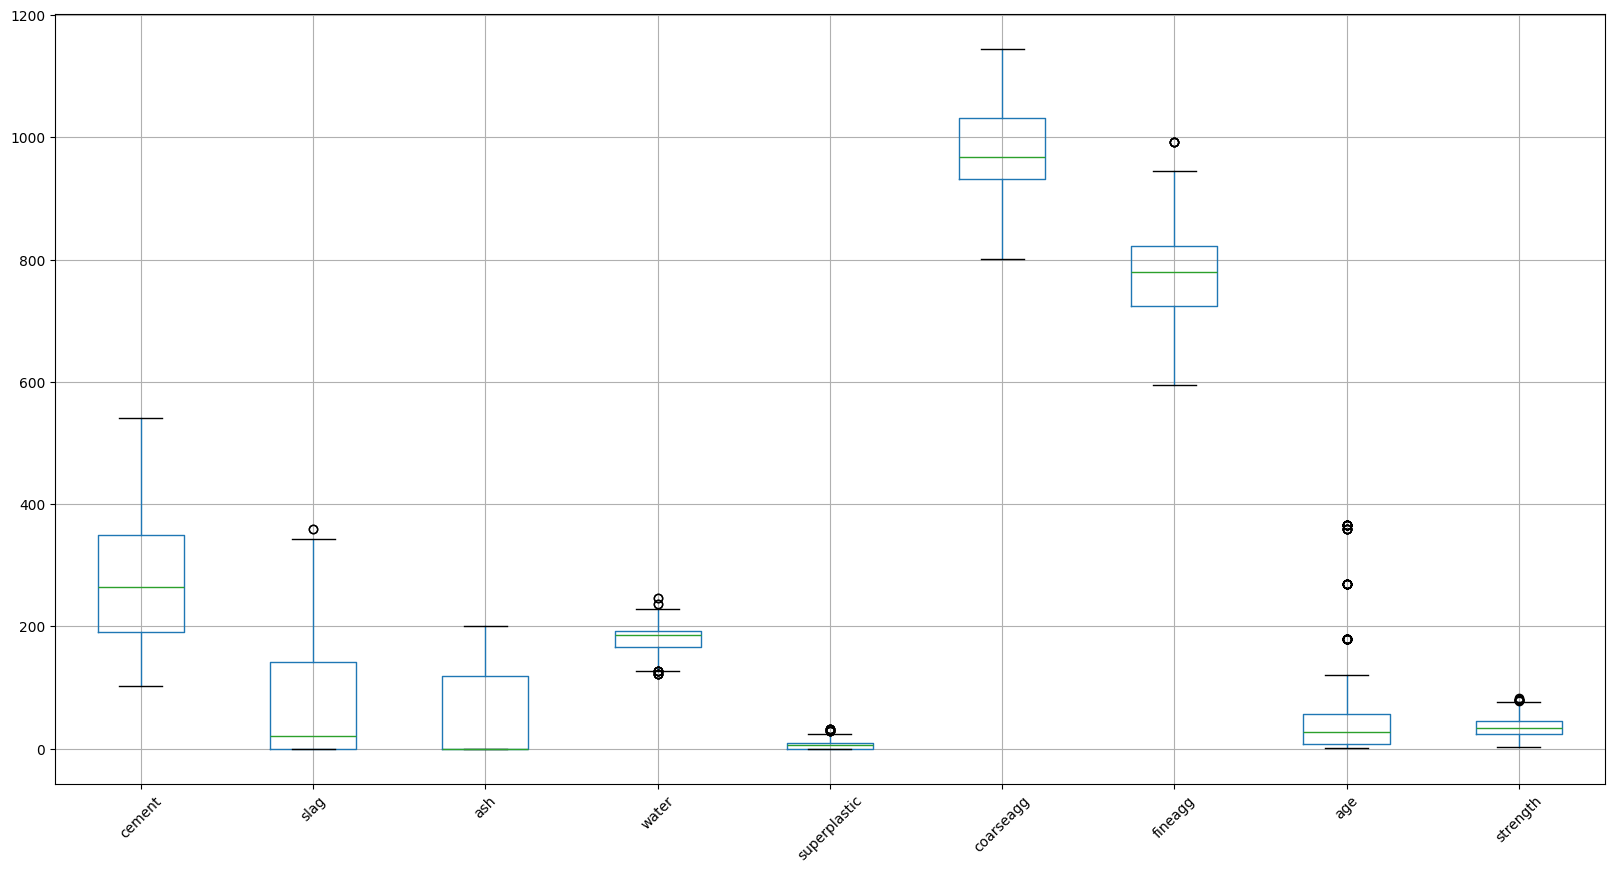

In [ ]:
concrete_df.boxplot(column=COLS, rot=45, figsize=(20,10))
plt.show()

In [ ]:
concrete_df_outliers = pd.DataFrame(concrete_df.loc[:,])

# IQR
Q1 = concrete_df_outliers.quantile(0.25)
Q3 = concrete_df_outliers.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

cement         158.3000000
slag           142.5000000
ash            118.3000000
water           26.3000000
superplastic    10.0000000
coarseagg       99.0000000
fineagg         97.9000000
age             49.0000000
strength        21.3500000
dtype: float64


In [ ]:
# We can use IQR score to filter out the outliers by keeping only valid values

# Replace every outlier on the upper side by the upper whisker - for 'water', 'superplastic',
# 'fineagg', 'age' and 'strength' columns
for i, j in zip(np.where(concrete_df_outliers > Q3 + 1.5 * IQR)[0], np.where(concrete_df_outliers > Q3 + 1.5 * IQR)[1]):

    whisker  = Q3 + 1.5 * IQR
    concrete_df_outliers.iloc[i,j] = whisker[j]

# Replace every outlier on the lower side by the lower whisker - for 'water' column
for i, j in zip(np.where(concrete_df_outliers < Q1 - 1.5 * IQR)[0], np.where(concrete_df_outliers < Q1 - 1.5 * IQR)[1]):

    whisker  = Q1 - 1.5 * IQR
    concrete_df_outliers.iloc[i,j] = whisker[j]

In [ ]:
# Remove outliers columns - 'water', 'superplastic', 'fineagg', 'age', 'water' and 'strength'
concrete_df.drop(columns = concrete_df.loc[:,], inplace = True)

In [ ]:
# Add 'water', 'superplastic', 'fineagg', 'age', 'water' and 'strength' with no outliers from concrete_df_outliers to
# concrete_df
concrete_df = pd.concat([concrete_df, concrete_df_outliers], axis = 1)

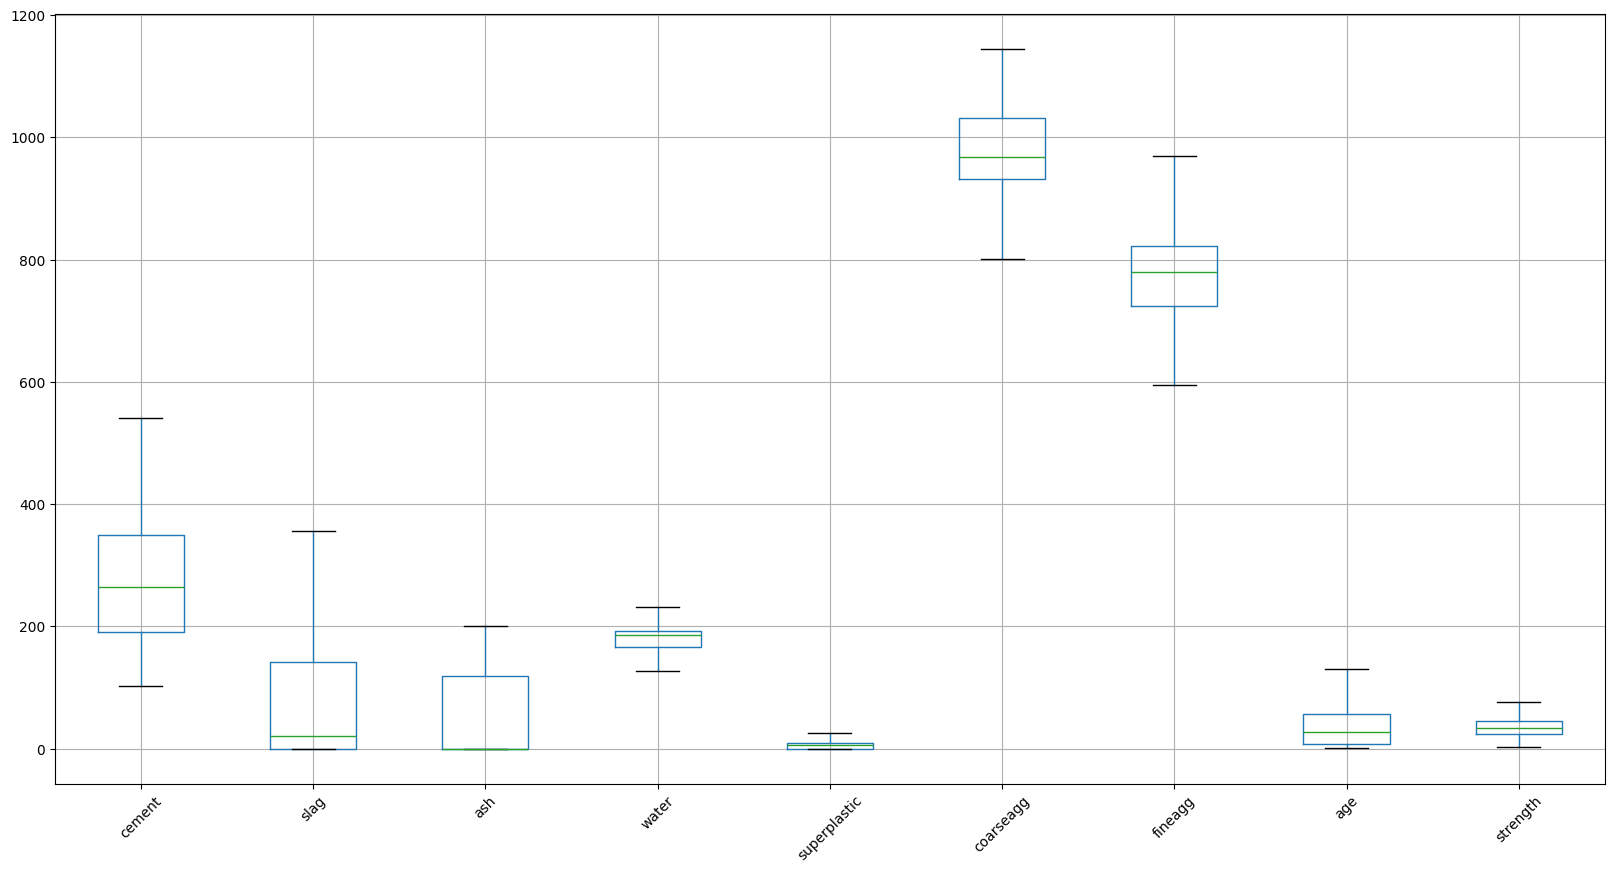

In [ ]:
concrete_df.boxplot(column=COLS, rot=45, figsize=(20,10))
plt.show()

Plot the distribution of classes in a bar chart. What did you observe? Is there primarily an equal
distribution of 5 classes, or is there an imbalance? (i.e., imbalance means if there are significant
differences such as more than 200 between 2 class samples)

### Check null, nan and duplications

In [ ]:
concrete_df.isnull().sum()

,0
cement,0
slag,0
ash,0
water,0
superplastic,0
coarseagg,0
fineagg,0
age,0
strength,0


In [ ]:
print(concrete_df.isna().sum())
concrete_df.fillna(-1, inplace=True)
print(concrete_df.isna().sum())
print("Shape after fill na: ", concrete_df.shape)

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64
cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64
Shape after fill na:  (1005, 9)


In [ ]:
# Check the presence of missing values
concrete_df_missval = concrete_df.copy()   # Make a copy of the dataframe
isduplicates = False

for x in concrete_df_missval.columns:
    concrete_df_missval[x] = concrete_df_missval[x].astype(str).str.replace(".", "")
    result = concrete_df_missval[x].astype(str).str.isalnum() # Check whether all characters are alphanumeric
    if False in result.unique():
        isduplicates = True
        print('For column "{}" unique values are {}'.format(x, concrete_df_missval[x].unique()))
        print('\n')

if not isduplicates:
    print('No duplicates in this dataset')

No duplicates in this dataset


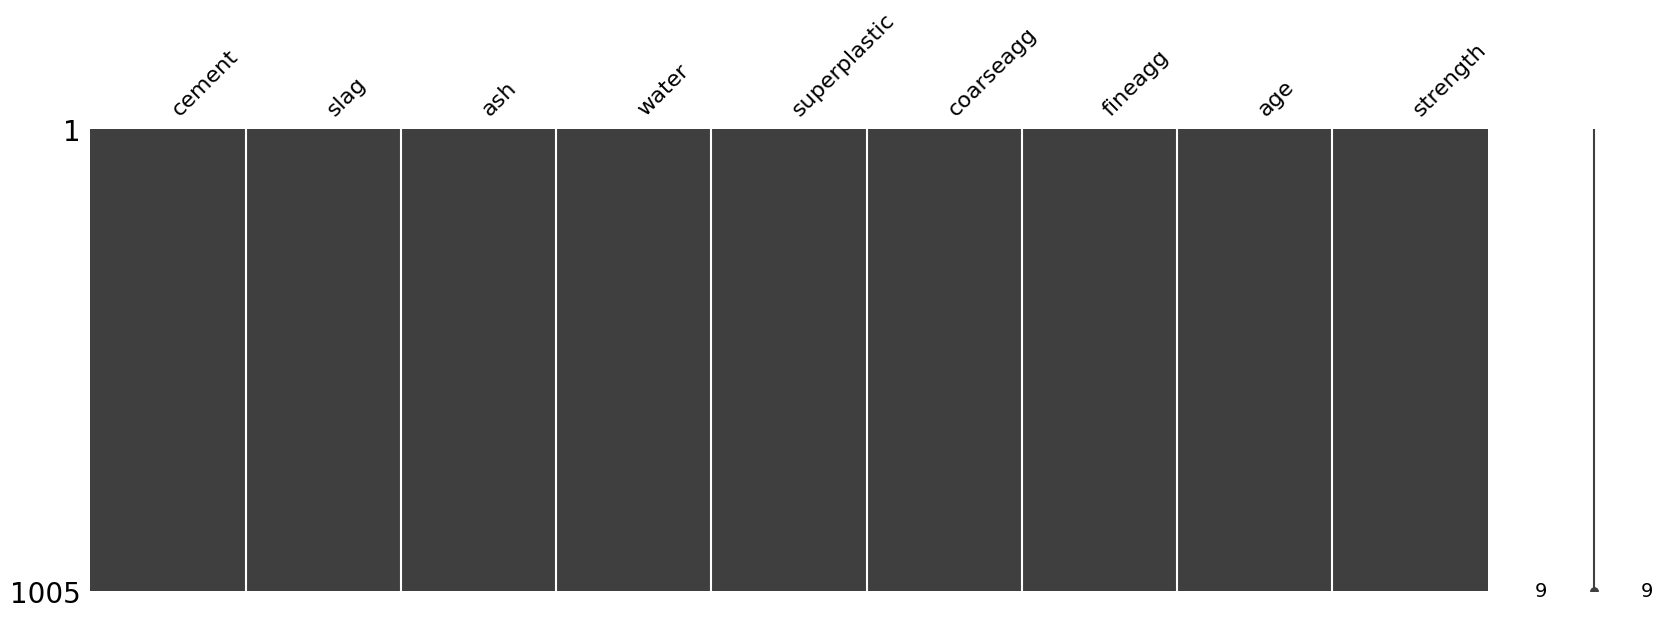

In [ ]:
mno.matrix(concrete_df, figsize = (20, 6));

In [ ]:
concrete_df.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,1005.0000000,278.6313433,104.3442607,102.0000000,190.7000000,265.0000000,349.0000000,540.0000000
slag,1005.0000000,72.0372139,86.1499938,0.0000000,0.0000000,20.0000000,142.5000000,356.2500000
ash,1005.0000000,55.5363184,64.2079686,0.0000000,0.0000000,0.0000000,118.3000000,200.1000000
water,1005.0000000,182.0668159,21.1586448,127.1500000,166.6000000,185.7000000,192.9000000,232.3500000
superplastic,1005.0000000,5.9814925,5.7244631,0.0000000,0.0000000,6.1000000,10.0000000,25.0000000
coarseagg,1005.0000000,974.3768159,77.5796667,801.0000000,932.0000000,968.0000000,1031.0000000,1145.0000000
fineagg,1005.0000000,772.5710945,80.0359343,594.0000000,724.3000000,780.0000000,822.2000000,969.0500000
age,1005.0000000,38.0761194,35.8625492,1.0000000,7.0000000,28.0000000,56.0000000,129.5000000
strength,1005.0000000,35.2263184,16.2202533,2.3300000,23.5200000,33.8000000,44.8700000,76.8950000


## Studio Activity 1: Class labelling / creating ground truth data

### Distribution of classes in a bar chart.

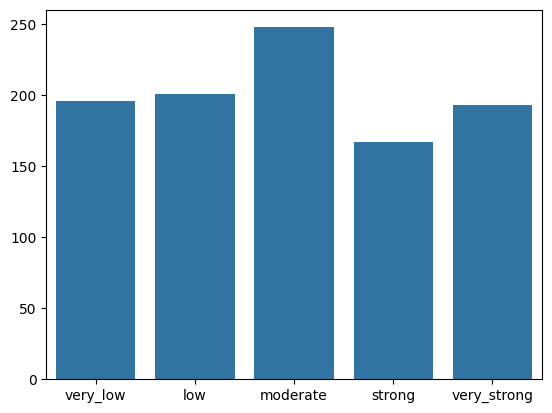

In [ ]:
strength_categories = {
    "very_low": 0,
    "low": 0,
    "moderate": 0,
    "strong": 0,
    "very_strong": 0
}

for i in range(len(concrete_df['strength'])):
  iter_val = concrete_df['strength'].iloc[i]
  match iter_val:
    case v_low if iter_val < 20:
      strength_categories['very_low'] += 1
    case low if iter_val >= 20 and iter_val <= 30:
      strength_categories['low'] += 1
    case med if iter_val >= 30 and iter_val <= 40:
      strength_categories['moderate'] += 1
    case strong if iter_val >= 40 and iter_val <= 50:
      strength_categories['strong'] += 1
    case v_strong if iter_val > 50:
      strength_categories['very_strong'] += 1

sns.barplot(x=list(strength_categories.keys()), y=list(strength_categories.values()))
plt.show()

What did you observe? Is there primarily an equal
distribution of 5 classes, or is there an imbalance? (i.e., imbalance means if there are significant
differences such as more than 200 between 2 class samples)

=> Equal distribution, not so imbalance as there are less than 200 diffs between classes

### Converts the numerical value strength to a categorial value

In [ ]:
for i in range(len(concrete_df['strength'])):
  iter_val = concrete_df['strength'].iloc[i]
  match iter_val:
    case v_low if iter_val < 20:
      concrete_df.at[i, 'strength'] = 1
    case low if iter_val >= 20 and iter_val <= 30:
      concrete_df.at[i, 'strength'] = 2
    case med if iter_val >= 30 and iter_val <= 40:
      concrete_df.at[i, 'strength'] = 3
    case strong if iter_val >= 40 and iter_val <= 50:
      concrete_df.at[i, 'strength'] = 4
    case v_strong if iter_val > 50:
      concrete_df.at[i, 'strength'] = 5


concrete_df['strength'] = concrete_df['strength'].astype(int)
concrete_df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3000000,212.0000000,0.0000000,203.5000000,0.0000000,971.8000000,748.5000000,28.0000000,2
1,168.9000000,42.2000000,124.3000000,158.3000000,10.8000000,1080.8000000,796.2000000,14.0000000,2
2,250.0000000,0.0000000,95.7000000,187.4000000,5.5000000,956.9000000,861.2000000,28.0000000,2
3,266.0000000,114.0000000,0.0000000,228.0000000,0.0000000,932.0000000,670.0000000,28.0000000,4
4,154.8000000,183.4000000,0.0000000,193.3000000,9.1000000,1047.4000000,696.7000000,28.0000000,1


In [ ]:
# Export the concrete_df to a new CSV file
concrete_df.to_csv(BASE_PATH + '/converted_concrete.csv', index=False)

In [ ]:
converted_df = pd.read_csv(BASE_PATH + '/converted_concrete.csv')
converted_concrete_df = converted_df.copy()

converted_concrete_df.head()
converted_concrete_df.isna().sum()

,0
cement,25
slag,25
ash,25
water,25
superplastic,25
coarseagg,25
fineagg,25
age,25
strength,0


## Pre-Studio Activity 2: Feature Engineering

### Short Explandatory Data Analysis

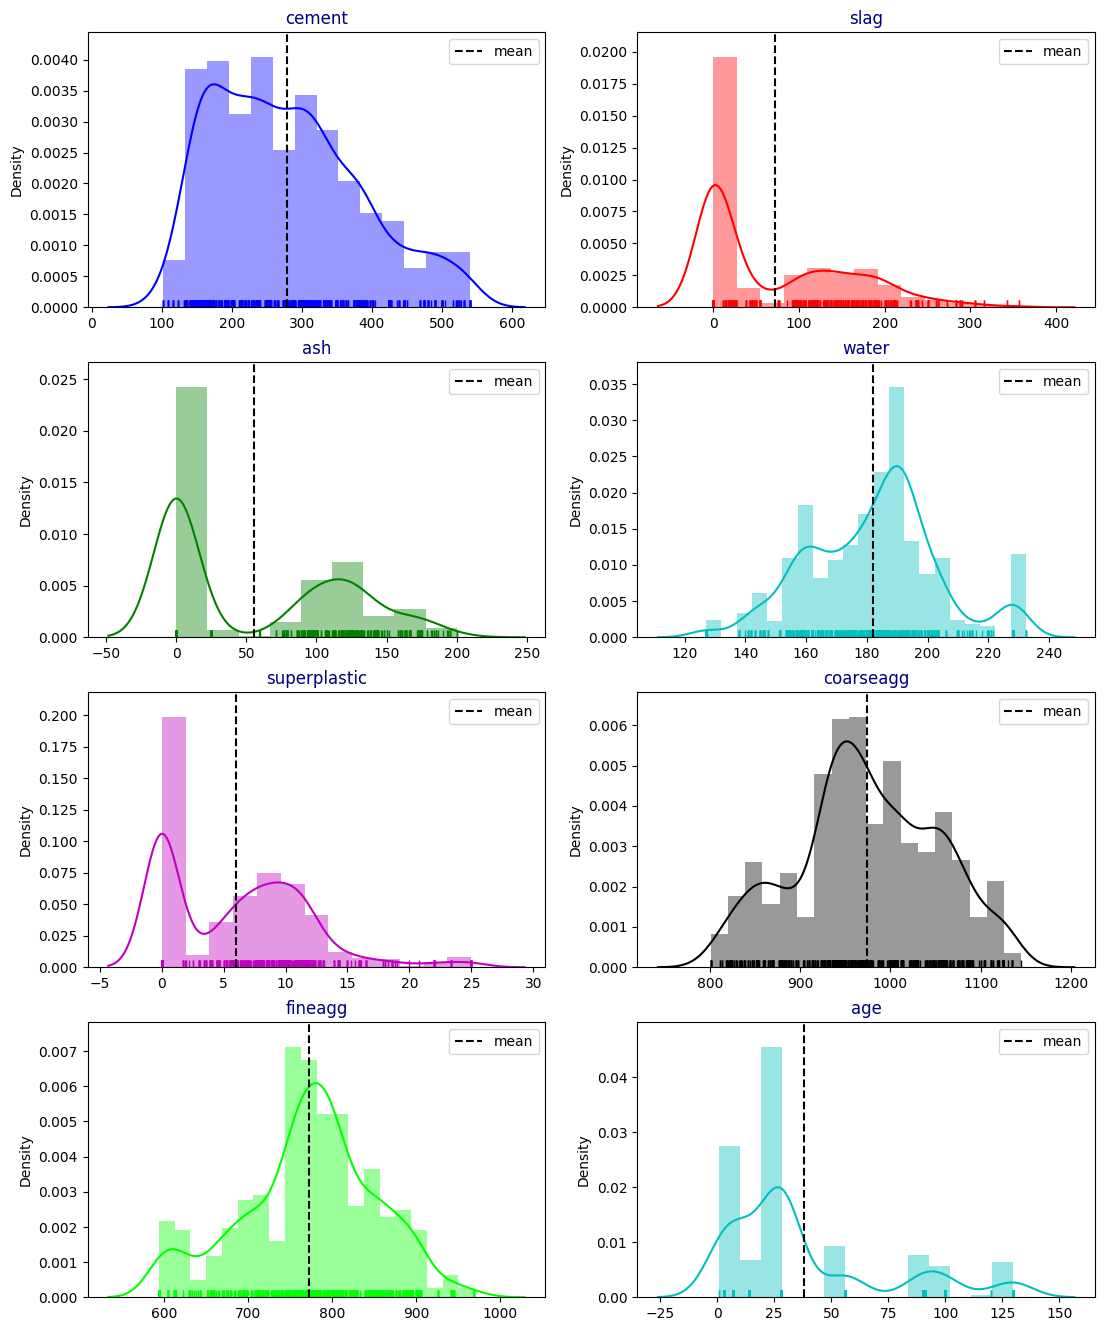

In [ ]:
# Plot the distribution of classes in a bar chart.
cols = [i for i in converted_concrete_df.columns if i not in 'strength']
length = len(cols)
cs = ["b","r","g","c","m","k","lime","c"]
fig = plt.figure(figsize=(13,25))

for i,j,k in itertools.zip_longest(cols,range(length),cs):
    plt.subplot(6,2,j+1)
    ax = sns.distplot(converted_concrete_df[i],color=k,rug=True)
    ax.set_facecolor("w")
    plt.axvline(converted_concrete_df[i].mean(),linestyle="dashed",label="mean",color="k")
    plt.legend(loc="best")
    plt.title(i,color="navy")
    plt.xlabel("")


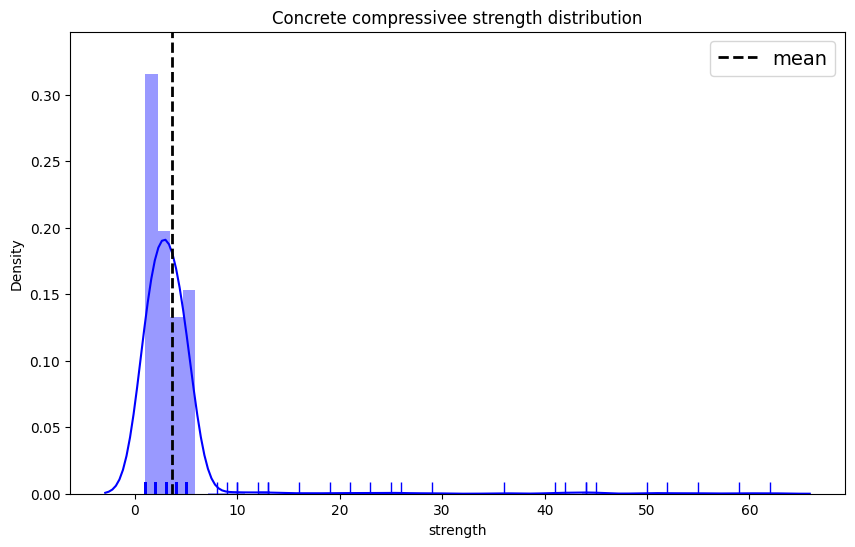

In [ ]:
plt.figure(figsize=(10,6))
sns.distplot(converted_concrete_df["strength"],color="b",rug=True)
plt.axvline(converted_concrete_df["strength"].mean(), linestyle="dashed",color="k", label='mean',linewidth=2)
plt.legend(loc="best",prop={"size":14})
plt.title("Concrete compressivee strength distribution")
plt.show()

### Summary Statistics

In [ ]:
converted_concrete_df.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,1005.0000000,278.6313433,104.3442607,102.0000000,190.7000000,265.0000000,349.0000000,540.0000000
slag,1005.0000000,72.0372139,86.1499938,0.0000000,0.0000000,20.0000000,142.5000000,356.2500000
ash,1005.0000000,55.5363184,64.2079686,0.0000000,0.0000000,0.0000000,118.3000000,200.1000000
water,1005.0000000,182.0668159,21.1586448,127.1500000,166.6000000,185.7000000,192.9000000,232.3500000
superplastic,1005.0000000,5.9814925,5.7244631,0.0000000,0.0000000,6.1000000,10.0000000,25.0000000
coarseagg,1005.0000000,974.3768159,77.5796667,801.0000000,932.0000000,968.0000000,1031.0000000,1145.0000000
fineagg,1005.0000000,772.5710945,80.0359343,594.0000000,724.3000000,780.0000000,822.2000000,969.0500000
age,1005.0000000,38.0761194,35.8625492,1.0000000,7.0000000,28.0000000,56.0000000,129.5000000
strength,1030.0000000,3.6300971,5.2074615,1.0000000,2.0000000,3.0000000,4.0000000,62.0000000


### Multivariate Analysis

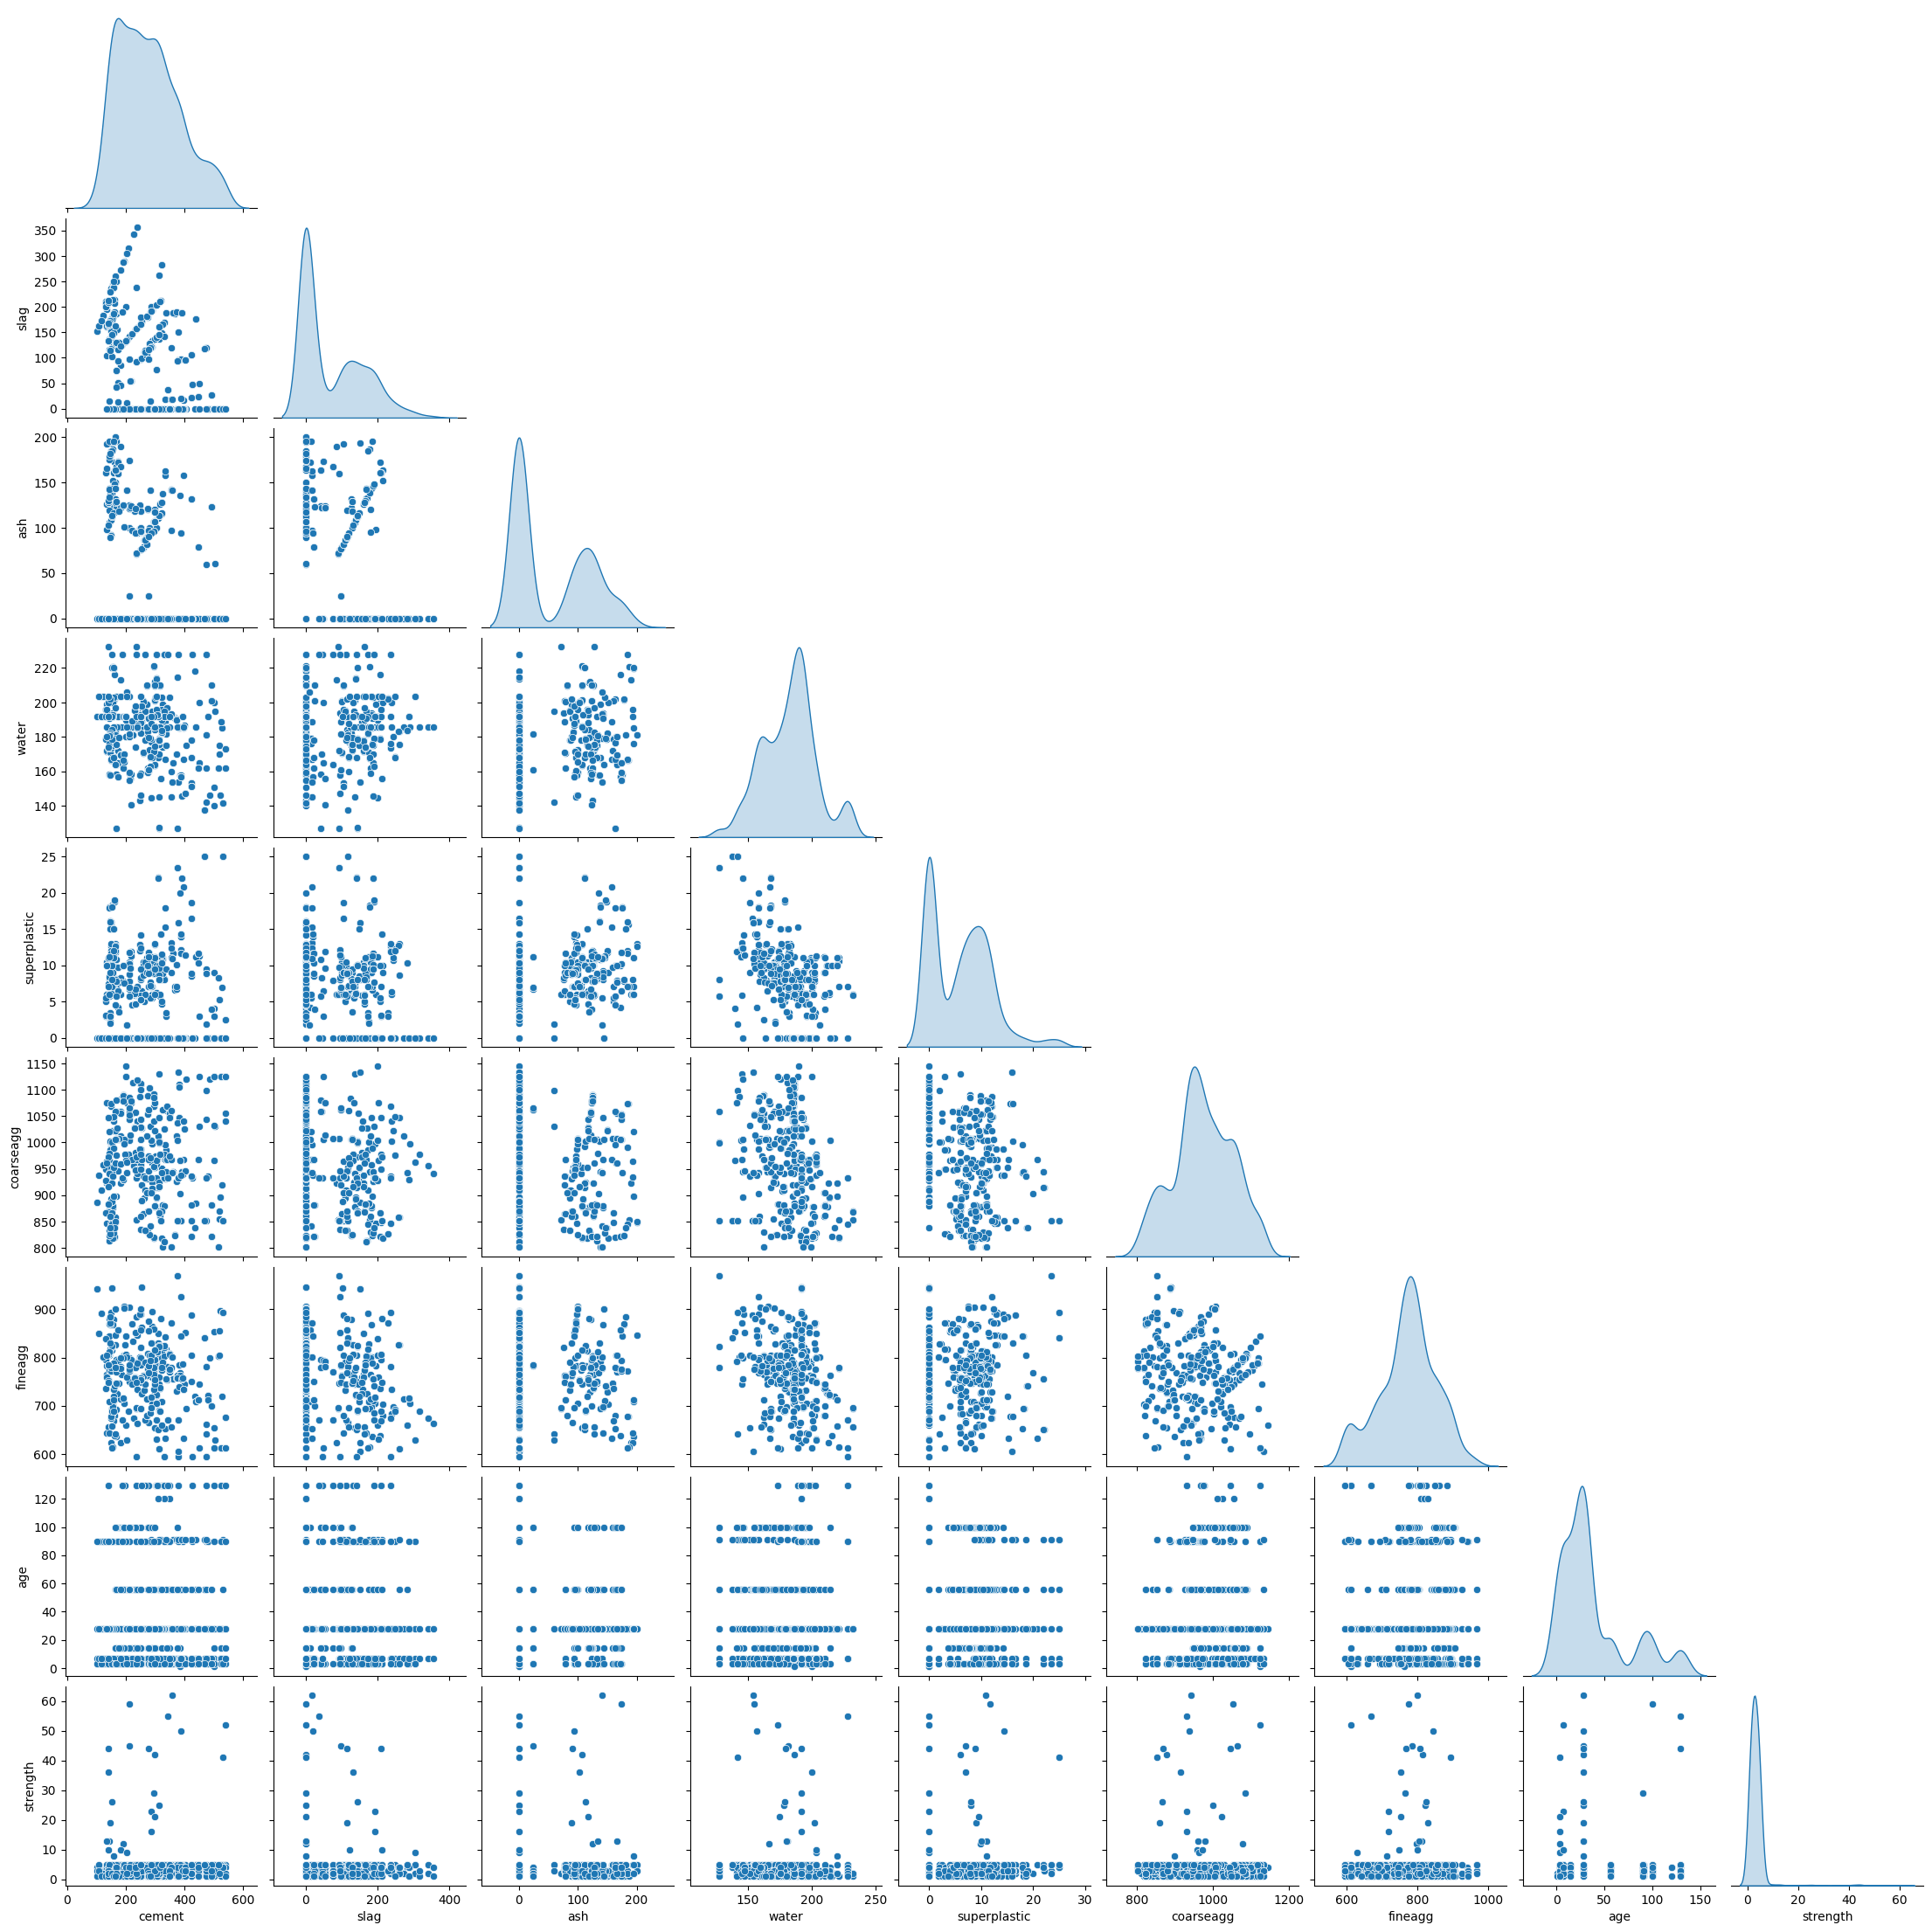

In [ ]:
sns.pairplot(converted_concrete_df, diag_kind='kde', corner=True)

### Correlation

In [ ]:
converted_concrete_df.corr()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
cement,1.0000000,-0.3033700,-0.3856098,-0.0572088,0.0448168,-0.0862053,-0.2476623,0.0556490,0.0549789
slag,-0.3033700,1.0000000,-0.3123648,0.1302267,0.0196023,-0.2775952,-0.2911288,-0.0546345,-0.0110942
ash,-0.3856098,-0.3123648,1.0000000,-0.2845415,0.4361848,-0.0264685,0.0918726,-0.0946261,0.0225506
water,-0.0572088,0.1302267,-0.2845415,1.0000000,-0.6560121,-0.2103993,-0.4441919,0.1945588,-0.0512670
superplastic,0.0448168,0.0196023,0.4361848,-0.6560121,1.0000000,-0.2357154,0.2019397,-0.1275331,0.0734696
coarseagg,-0.0862053,-0.2775952,-0.0264685,-0.2103993,-0.2357154,1.0000000,-0.1604944,0.0127844,-0.0243298
fineagg,-0.2476623,-0.2911288,0.0918726,-0.4441919,0.2019397,-0.1604944,1.0000000,-0.0979334,-0.0073015
age,0.0556490,-0.0546345,-0.0946261,0.1945588,-0.1275331,0.0127844,-0.0979334,1.0000000,0.0510096
strength,0.0549789,-0.0110942,0.0225506,-0.0512670,0.0734696,-0.0243298,-0.0073015,0.0510096,1.0000000


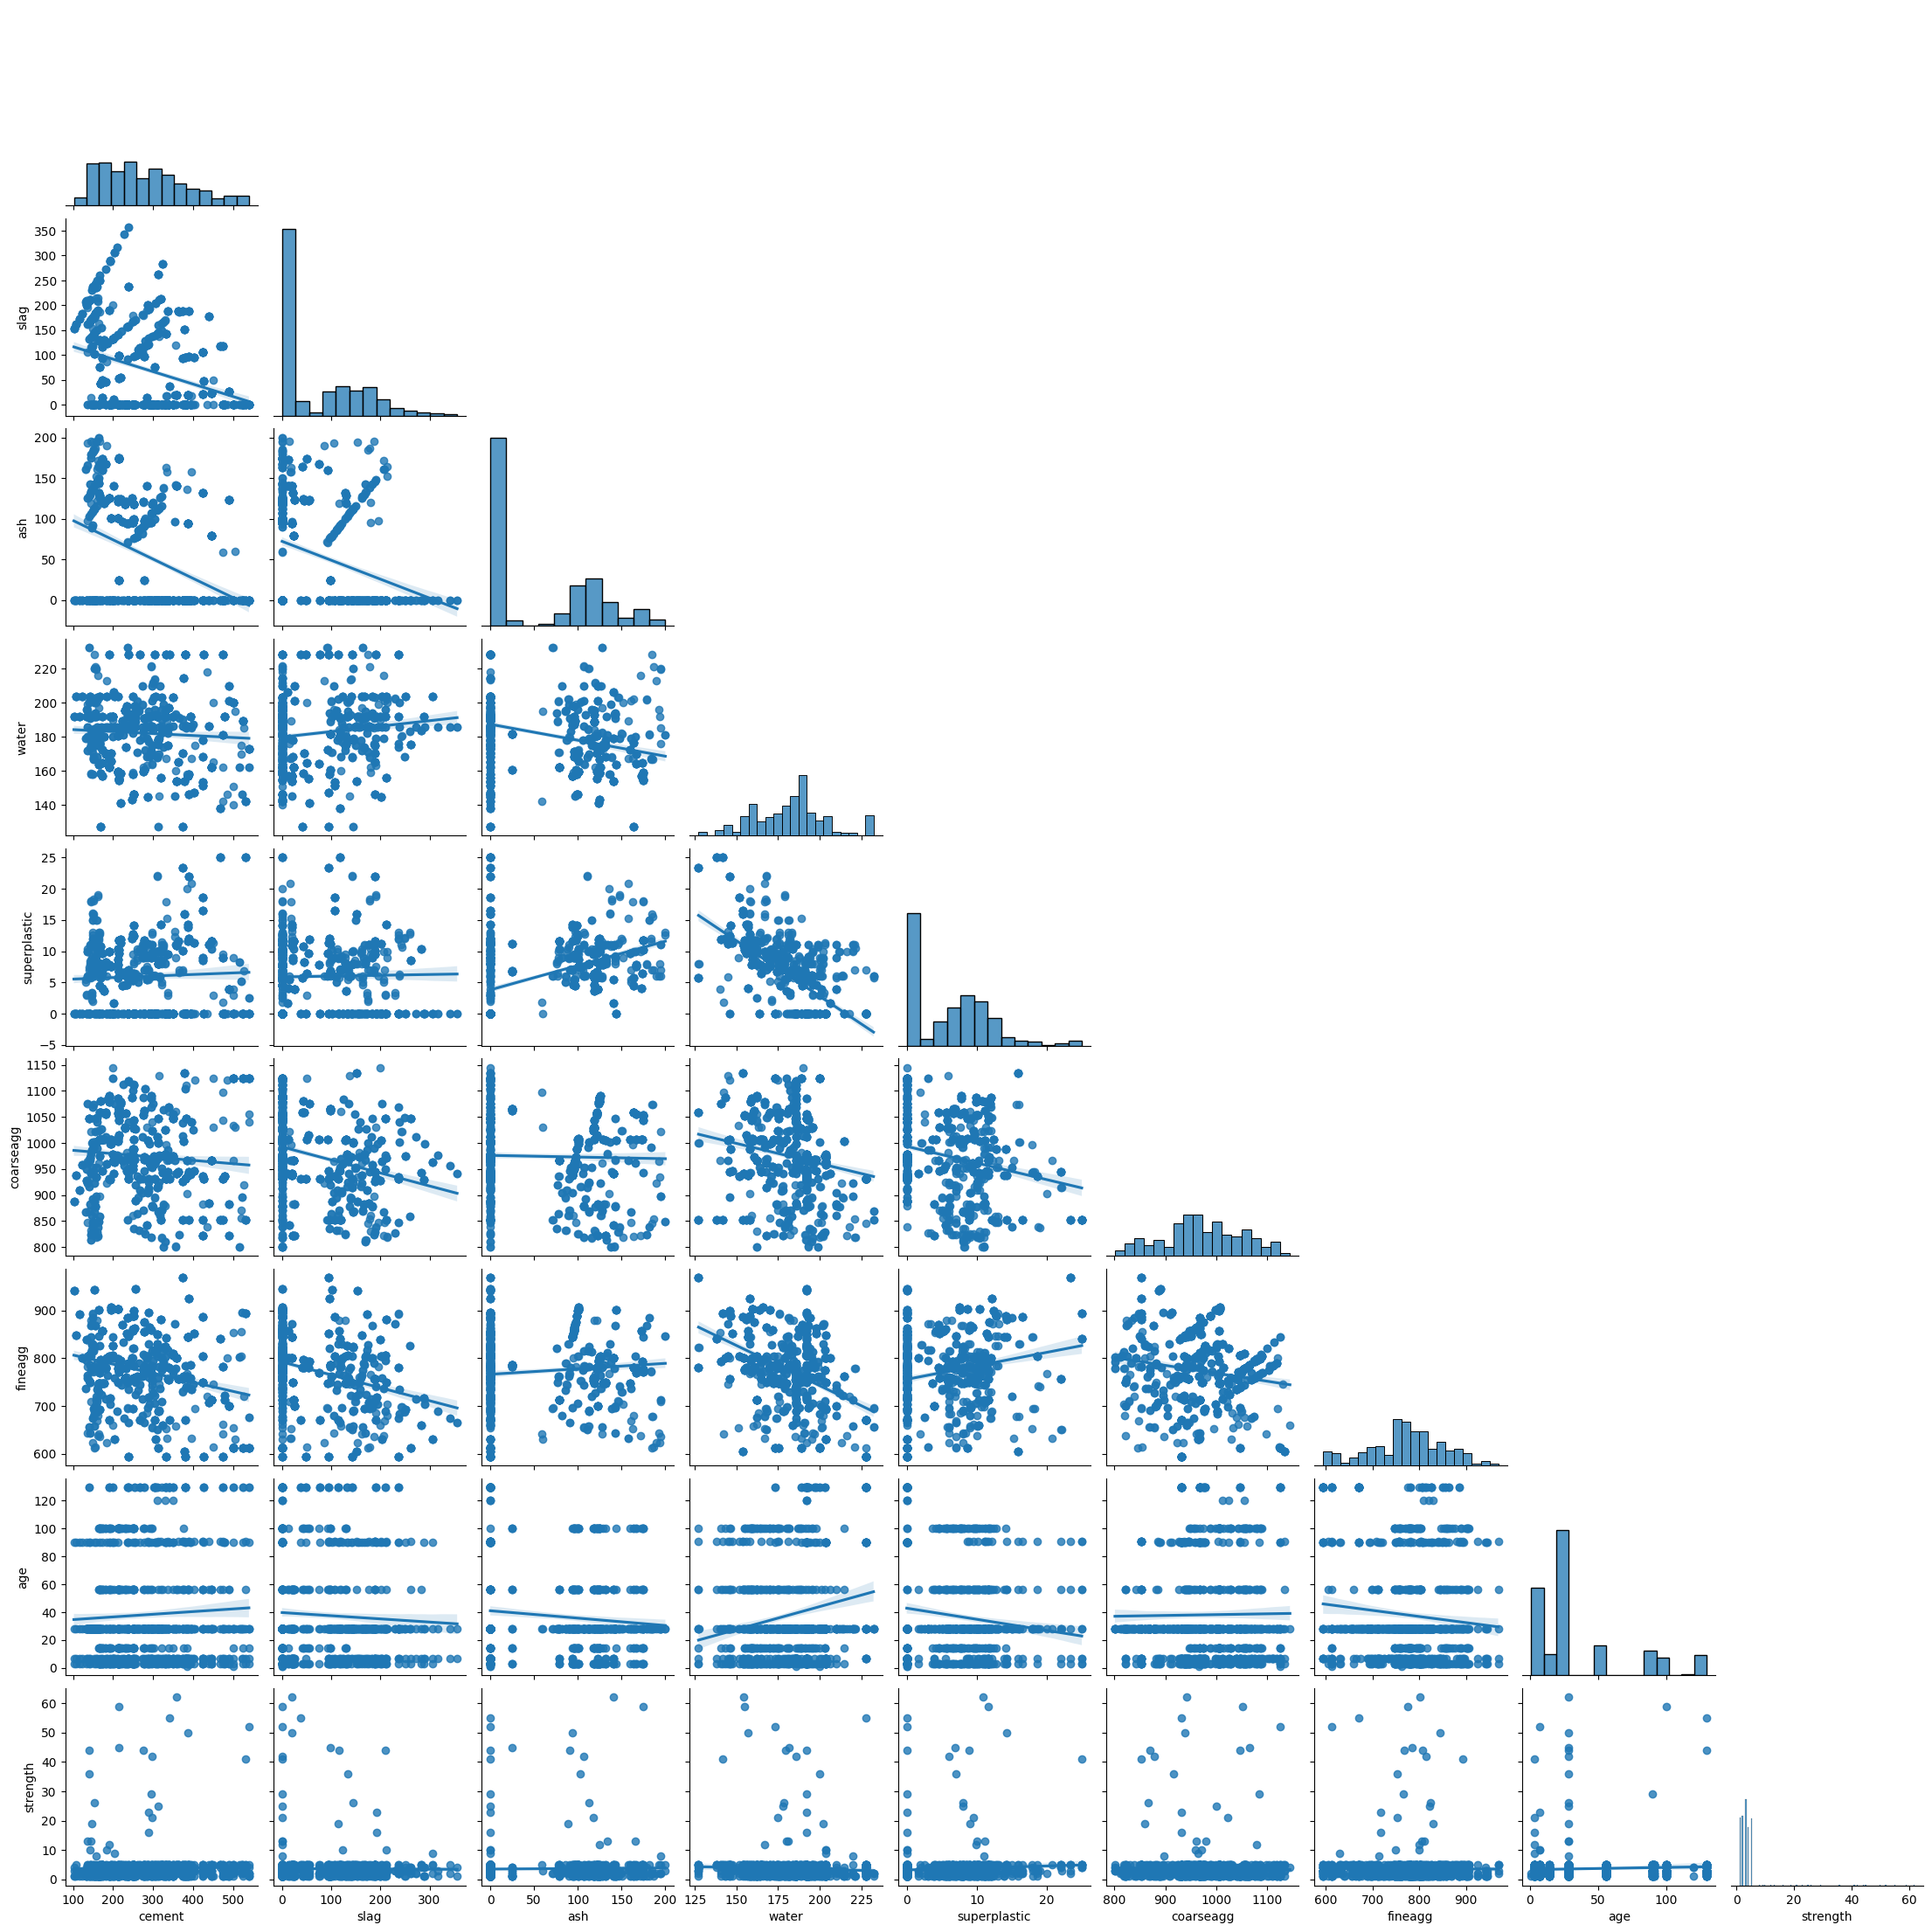

In [ ]:
sns.pairplot(converted_concrete_df[COLS], kind='reg', corner=True)

### Heatmap

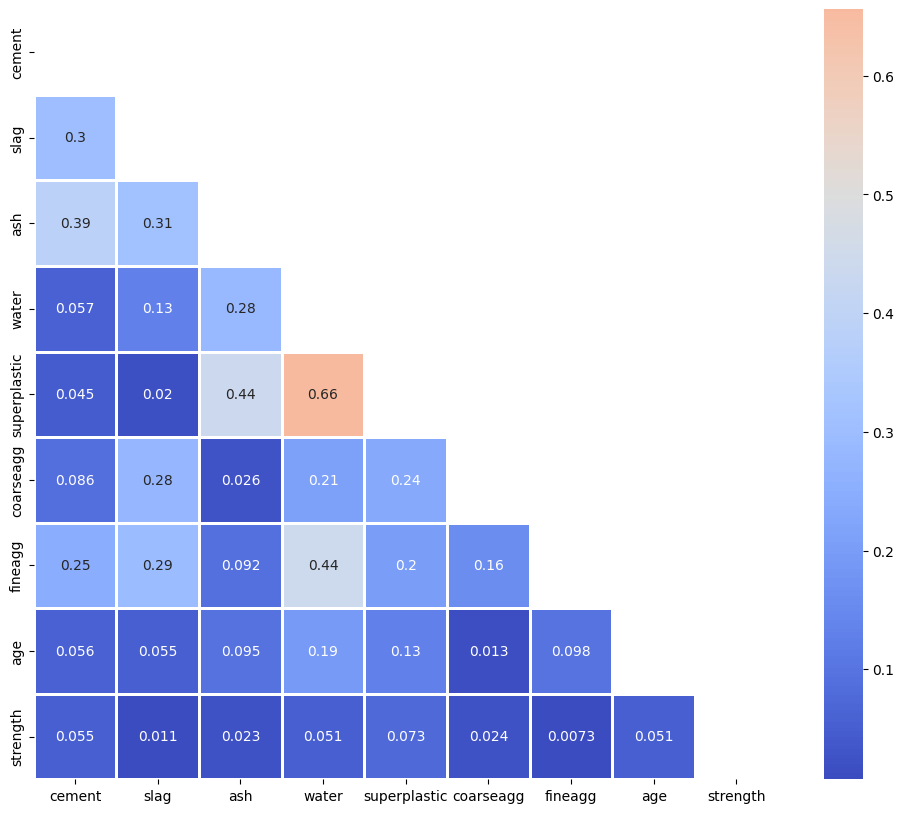

In [ ]:
corr = abs(converted_concrete_df.corr()) # correlation matrix
lower_triangle = np.tril(corr, k = -1)  # select only the lower triangle of the correlation matrix
mask = lower_triangle == 0  # to mask the upper triangle in the following heatmap

plt.figure(figsize = (12,10))
sns.heatmap(lower_triangle, center = 0.5, cmap = 'coolwarm', annot= True, xticklabels = corr.index, yticklabels = corr.columns,
            cbar= True, linewidths= 1, mask = mask)   # Da Heatmap
plt.show()

## Studio Activity 2: Feature Engineering

### Get unique value and categorizes using one hot encoder

In [ ]:
unique_age = converted_concrete_df['age'].unique()
print(unique_age)

[ 28.   14.   90.    7.   56.    3.  100.   91.  129.5 120.    1.    nan]


In [ ]:
CATEGORICAL_COLS = ["age"]
encoder = OneHotEncoder(drop='first', sparse_output=False, dtype=float)
encoded_cats = encoder.fit_transform(converted_concrete_df[CATEGORICAL_COLS])

encoded_df = pd.DataFrame(encoded_cats, columns=encoder.get_feature_names_out(CATEGORICAL_COLS))

NUMERIC_COLS = [col for col in converted_concrete_df.columns if col not in CATEGORICAL_COLS]
encoded_converted_concrete_df = pd.concat([converted_concrete_df[NUMERIC_COLS], encoded_df], axis=1)

encoded_converted_concrete_df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,strength,age_3.0,age_7.0,age_14.0,age_28.0,age_56.0,age_90.0,age_91.0,age_100.0,age_120.0,age_129.5,age_nan
0,141.3000000,212.0000000,0.0000000,203.5000000,0.0000000,971.8000000,748.5000000,2,0.0000000,0.0000000,0.0000000,1.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000
1,168.9000000,42.2000000,124.3000000,158.3000000,10.8000000,1080.8000000,796.2000000,2,0.0000000,0.0000000,1.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000
2,250.0000000,0.0000000,95.7000000,187.4000000,5.5000000,956.9000000,861.2000000,2,0.0000000,0.0000000,0.0000000,1.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000
3,266.0000000,114.0000000,0.0000000,228.0000000,0.0000000,932.0000000,670.0000000,4,0.0000000,0.0000000,0.0000000,1.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000
4,154.8000000,183.4000000,0.0000000,193.3000000,9.1000000,1047.4000000,696.7000000,1,0.0000000,0.0000000,0.0000000,1.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000


### Drop Na values

In [ ]:
encoded_converted_concrete_df.isna().sum()
encoded_converted_concrete_df.dropna(inplace=True)
encoded_converted_concrete_df.isna().sum()

,0
cement,0
slag,0
ash,0
water,0
superplastic,0
coarseagg,0
fineagg,0
strength,0
age_3.0,0
age_7.0,0


### Min max scaling and save as normalised_concrete.csv

In [ ]:
encoded_converted_df_min_max_scaled = encoded_converted_concrete_df.copy()
MIN_MAX_SCALED_COLS = [i for i in encoded_converted_df_min_max_scaled.columns if i not in 'strength']
for c in MIN_MAX_SCALED_COLS:
  encoded_converted_df_min_max_scaled[c] = (encoded_converted_df_min_max_scaled[c] - encoded_converted_df_min_max_scaled[c].min()) / (encoded_converted_df_min_max_scaled[c].max() - encoded_converted_df_min_max_scaled[c].min())

print(encoded_converted_df_min_max_scaled.head())

     cement      slag       ash     water  superplastic  coarseagg   fineagg  \
0 0.0897260 0.5950877 0.0000000 0.7257605     0.0000000  0.4965116 0.4119451   
1 0.1527397 0.1184561 0.6211894 0.2961027     0.4320000  0.8133721 0.5391281   
2 0.3378995 0.0000000 0.4782609 0.5727186     0.2200000  0.4531977 0.7124383   
3 0.3744292 0.3200000 0.0000000 0.9586502     0.0000000  0.3808140 0.2026396   
4 0.1205479 0.5148070 0.0000000 0.6288023     0.3640000  0.7162791 0.2738302   

   strength   age_3.0   age_7.0  age_14.0  age_28.0  age_56.0  age_90.0  \
0         2 0.0000000 0.0000000 0.0000000 1.0000000 0.0000000 0.0000000   
1         2 0.0000000 0.0000000 1.0000000 0.0000000 0.0000000 0.0000000   
2         2 0.0000000 0.0000000 0.0000000 1.0000000 0.0000000 0.0000000   
3         4 0.0000000 0.0000000 0.0000000 1.0000000 0.0000000 0.0000000   
4         1 0.0000000 0.0000000 0.0000000 1.0000000 0.0000000 0.0000000   

   age_91.0  age_100.0  age_120.0  age_129.5  age_nan  
0 0.0000000 

In [ ]:
encoded_converted_df_min_max_scaled.to_csv(BASE_PATH + '/normalised_concrete.csv', index=False)

### Create four new composite features and save it to features_concrete.csv

In [ ]:
# Load the normalized data
raw_normalised_df = pd.read_csv(BASE_PATH + '/normalised_concrete.csv')
normalised_df = raw_normalised_df.copy()

# Calculate covariance between normalized features
normalised_df['cement_slag'] = np.cov(normalised_df['cement'], normalised_df['slag'])[0, 1]
normalised_df['cement_ash'] = np.cov(normalised_df['cement'], normalised_df['ash'])[0, 1]
normalised_df['water_fineeg'] = np.cov(normalised_df['water'], normalised_df['fineagg'])[0, 1]
normalised_df['ash_superplastic'] = np.cov(normalised_df['ash'], normalised_df['superplastic'])[0, 1]

# Save the data with composite features
normalised_df.to_csv(BASE_PATH + '/features_concrete.csv', index=False)


## Studio Activity 3: Feature selection

### Keep “Except 'Cement', 'Water', 'Superplastic' and 'Age' composite features and drop other features from “features_concrete.csv”. And save your new data as “selected_feature_concrete.csv”.

In [ ]:
raw_features_concrete_df = pd.read_csv(BASE_PATH + '/features_concrete.csv')
features_concrete_df = raw_features_concrete_df.copy()
features_concrete_df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,strength,age_3.0,age_7.0,age_14.0,age_28.0,age_56.0,age_90.0,age_91.0,age_100.0,age_120.0,age_129.5,age_nan,cement_slag,cement_ash,water_fineeg,ash_superplastic
0,0.0897260,0.5950877,0.0000000,0.7257605,0.0000000,0.4965116,0.4119451,2,0.0000000,0.0000000,0.0000000,1.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,NaN,-0.0174770,-0.0294771,-0.0190651,0.0320485
1,0.1527397,0.1184561,0.6211894,0.2961027,0.4320000,0.8133721,0.5391281,2,0.0000000,0.0000000,1.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,NaN,-0.0174770,-0.0294771,-0.0190651,0.0320485
2,0.3378995,0.0000000,0.4782609,0.5727186,0.2200000,0.4531977,0.7124383,2,0.0000000,0.0000000,0.0000000,1.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,NaN,-0.0174770,-0.0294771,-0.0190651,0.0320485
3,0.3744292,0.3200000,0.0000000,0.9586502,0.0000000,0.3808140,0.2026396,4,0.0000000,0.0000000,0.0000000,1.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,NaN,-0.0174770,-0.0294771,-0.0190651,0.0320485
4,0.1205479,0.5148070,0.0000000,0.6288023,0.3640000,0.7162791,0.2738302,1,0.0000000,0.0000000,0.0000000,1.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,NaN,-0.0174770,-0.0294771,-0.0190651,0.0320485


In [ ]:
# Keep only 'Cement', 'Water', 'Superplastic', 'Age', 'strength', 'cement_slag', 'cement_ash', 'water_fineeg', 'ash_superplastic'
selected_features_df = features_concrete_df.drop(columns=['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg', 'fineagg'])

# Save the selected features to a new CSV file
selected_features_df.to_csv(BASE_PATH + '/selected_feature_concrete.csv', index=False)


In [ ]:
selected_features_df.head()

,strength,age_3.0,age_7.0,age_14.0,age_28.0,age_56.0,age_90.0,age_91.0,age_100.0,age_120.0,age_129.5,age_nan,cement_slag,cement_ash,water_fineeg,ash_superplastic
0,2,0.0000000,0.0000000,0.0000000,1.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,NaN,-0.0174770,-0.0294771,-0.0190651,0.0320485
1,2,0.0000000,0.0000000,1.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,NaN,-0.0174770,-0.0294771,-0.0190651,0.0320485
2,2,0.0000000,0.0000000,0.0000000,1.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,NaN,-0.0174770,-0.0294771,-0.0190651,0.0320485
3,4,0.0000000,0.0000000,0.0000000,1.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,NaN,-0.0174770,-0.0294771,-0.0190651,0.0320485
4,1,0.0000000,0.0000000,0.0000000,1.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,NaN,-0.0174770,-0.0294771,-0.0190651,0.0320485


### Save selected_converted_concrete.csv (selected feature without normalisation) [here select only 'Cement', 'Water', 'Superplastic' and 'Age' as a feature]

In [ ]:
converted_concrete_df.head()
selected_converted_concrete_df = converted_concrete_df.drop(columns=['slag', 'ash', 'coarseagg', 'fineagg'])

In [ ]:
print(selected_converted_concrete_df.head())
selected_converted_concrete_df.to_csv(BASE_PATH + '/selected_converted_concrete.csv', index=False)

       cement       water  superplastic        age  strength
0 141.3000000 203.5000000     0.0000000 28.0000000         2
1 168.9000000 158.3000000    10.8000000 14.0000000         2
2 250.0000000 187.4000000     5.5000000 28.0000000         2
3 266.0000000 228.0000000     0.0000000 28.0000000         4
4 154.8000000 193.3000000     9.1000000 28.0000000         1


## Studio Activity 4: Model Development

### Import required libraries

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

from dataclasses import dataclass, field
from typing import List, Tuple, Optional, Dict

### Define test_result

In [ ]:
test_result: Dict[str, int] = {}

### Define shared function for import csv, split data, fit and predict

In [ ]:
@dataclass
class ModelConfig:
  path_to_dataset: str
  is_df_scaled: Optional[bool] = False
  feature_cols: List[str]
  target_col: str
  test_size: Optional[float] = 0.3
  random_state: Optional[int] = 1
  ref_to_test_result: Optional[Dict[str, int]] = field(default_factory=lambda: test_result)

In [ ]:
def create_model(cfg: ModelConfig) -> DecisionTreeClassifier:

  _internal_df = pd.read_csv(cfg.path_to_dataset)
  _internal_x = _internal_df[cfg.feature_cols]
  _internal_y = _internal_df[cfg.target_col]
  _internal_x_train, _internal_x_test, _internal_y_train, _internal_y_test = train_test_split(_internal_x, _internal_y, test_size=cfg.test_size, random_state=cfg.random_state)

  _internal_clf = DecisionTreeClassifier()
  _internal_clf = _internal_clf.fit(_internal_x_train, _internal_y_train)
  _internal_y_pred = _internal_clf.predict(_internal_x_test)
  print("Accuracy:", metrics.accuracy_score(_internal_y_test, _internal_y_pred))
  if cfg.ref_to_test_result is not None:
    _internal_name_of_file = cfg.path_to_dataset.split("/")[-1].split(".")[0]
    cfg.ref_to_test_result[_internal_name_of_file] = metrics.accuracy_score(_internal_y_test, _internal_y_pred)
  return _internal_clf

### Model for selected_converted_concrete.csv

In [ ]:
selected_converted_concrete_options = ModelConfig(BASE_PATH + "/selected_converted_concrete.csv", ["cement", "water", "superplastic", "age", "strength"], "strength")
selected_converted_concrete_model = create_model(selected_converted_concrete_options)

/content/gdrive/MyDrive/Colab Notebooks/COS40007/Studio 2/selected_converted_concrete.csv
Accuracy: 0.9773462783171522


### Model for converted_concrete.csv

In [ ]:
converted_concrete_options = ModelConfig(BASE_PATH + "/converted_concrete.csv", ["cement", "slag", "ash", "water", "superplastic", "coarseagg", "fineagg", "age", "strength"], "strength")
converted_concrete_model = create_model(converted_concrete_options)

/content/gdrive/MyDrive/Colab Notebooks/COS40007/Studio 2/converted_concrete.csv
Accuracy: 0.9773462783171522


### Model for selected_feature_concrete.csv

In [ ]:
selected_feature_concrete_options = ModelConfig(BASE_PATH + "/selected_feature_concrete.csv", ["strength", "age_3.0", "age_7.0", "age_14.0", "age_28.0", "age_56.0", "age_90.0", "age_91.0", "age_100.0", "age_120.0", "age_129.5", "age_nan", "cement_slag", "cement_ash", "water_fineeg", "ash_superplastic"], "strength")
selected_feature_concrete_model = create_model(selected_feature_concrete_options)

/content/gdrive/MyDrive/Colab Notebooks/COS40007/Studio 2/selected_feature_concrete.csv
Accuracy: 0.9701986754966887


### Model for normalised_concrete.csv

In [ ]:
normalised_concrete_options = ModelConfig(BASE_PATH + "/normalised_concrete.csv",  ["cement", "slag", "ash", "water", "superplastic", "coarseagg", "fineagg", "strength", "age_3.0", "age_7.0", "age_14.0", "age_28.0", "age_56.0", "age_90.0", "age_91.0", "age_100.0", "age_120.0", "age_129.5", "age_nan"], "strength")
normalised_concrete_model = create_model(normalised_concrete_options)

/content/gdrive/MyDrive/Colab Notebooks/COS40007/Studio 2/normalised_concrete.csv
Accuracy: 0.9701986754966887


### Model for features_concrete.csv

In [ ]:
features_concrete_options = ModelConfig(BASE_PATH + "/features_concrete.csv", ["cement", "slag", "ash", "water", "superplastic", "coarseagg", "fineagg", "strength", "age_3.0", "age_7.0", "age_14.0", "age_28.0", "age_56.0", "age_90.0", "age_91.0", "age_100.0", "age_120.0", "age_129.5", "age_nan", "cement_slag", "cement_ash", "water_fineeg", "ash_superplastic"], "strength")
features_concrete_model = create_model(features_concrete_options)

/content/gdrive/MyDrive/Colab Notebooks/COS40007/Studio 2/features_concrete.csv
Accuracy: 0.9701986754966887


### Convert test result to percentage

In [ ]:
for k, v in enumerate(test_result):
  test_result[v] = test_result[v] * 100
  print(k + 1, v, test_result[v])

1 selected_converted_concrete 97.73462783171522
2 converted_concrete 97.73462783171522
3 selected_feature_concrete 97.01986754966887
4 normalised_concrete 97.01986754966887
5 features_concrete 97.01986754966887
